In [8]:
import torch

x = torch.ones(2, 2, requires_grad = True)
y = x + 1
z = 2 * y ** 2
r = z.mean()
print(f"Result: {r}")

Result: 8.0


In [9]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [10]:
y

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [11]:
z

tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)

In [12]:
r

tensor(8., grad_fn=<MeanBackward0>)

In [13]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


In [17]:
import matplotlib.pyplot as plt

x = torch.FloatTensor(range(5))

In [18]:
x

tensor([0., 1., 2., 3., 4.])

In [19]:
x = torch.FloatTensor(range(5)).unsqueeze(1)

In [20]:
x

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [21]:
y = 2*x + torch.rand(5, 1)

In [22]:
y

tensor([[0.1723],
        [2.0202],
        [4.4790],
        [6.1536],
        [8.1339]])

In [23]:
num_features = x.shape[1]

In [24]:
w = torch.randn(num_features, 1, requires_grad = True)
b = torch.randn(1, requires_grad = True)

In [30]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr = learning_rate)

In [26]:
loss_stack = []
for epoch in range(1001):

    optimizer.zero_grad()
    y_hat = torch.matmul(x, w) + b
    loss = torch.mean((y_hat - y)**2)
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: {loss.item()}")

Epoch 0: 49.57064437866211
Epoch 100: 5.626873970031738
Epoch 200: 2.4144740104675293
Epoch 300: 1.9716163873672485
Epoch 400: 1.7406368255615234
Epoch 500: 1.5465584993362427
Epoch 600: 1.3750584125518799
Epoch 700: 1.2229111194610596
Epoch 800: 1.087893009185791
Epoch 900: 0.9680720567703247
Epoch 1000: 0.8617372512817383


In [27]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

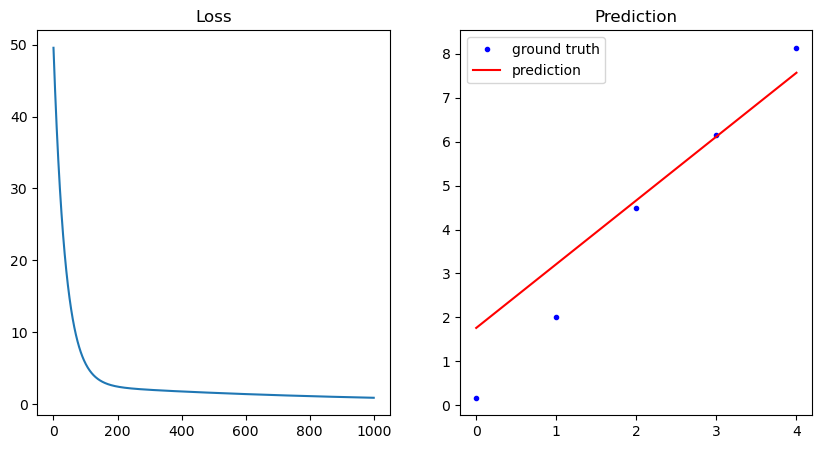

In [28]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')

plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")

plt.show()